# Import Functions

In [1]:
from pathlib import Path 
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from collections.abc import Iterable
import scipy.special as sc
import cartopy.crs as ccrs
from scipy.io import netcdf
import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import pandas as pd

# Plotting the Mean Emissivity Spectrum

In [3]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT1_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
ds

(9, 63)
(63,)


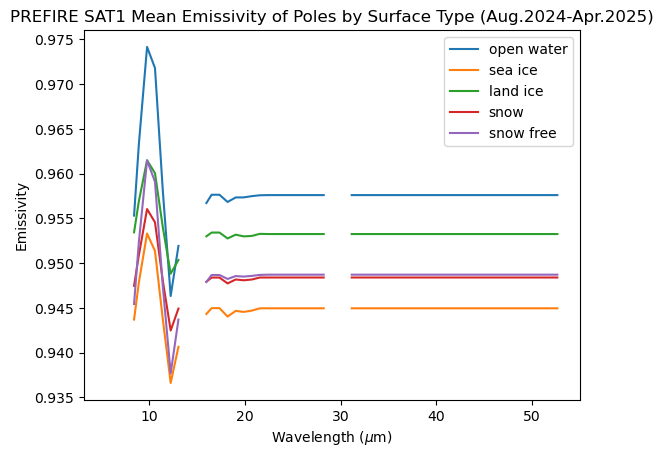

In [6]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT1_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
emissivity=ds["emis_mean"]
emissivity=emissivity.mean("time")
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("lon") # take a mean spatially across longitude
emissivity=emissivity.mean("lat") # take a mean spatially across latitude
#define a variable for each surface type
#I'm just going to do open ocean, sea ice, land ice, snow-covered land, and snow-free for now
open_water_emissivity=emissivity.sel(sfc_type=0)
sea_ice_emissivity=emissivity.sel(sfc_type=1)
land_ice_emissivity=emissivity.sel(sfc_type=3)
snow_covered_emissivity=emissivity.sel(sfc_type=5)
snow_free_emissivity=emissivity.sel(sfc_type=7)
#print the shape as a sanity check
print(emissivity.shape)
print(open_water_emissivity.shape)
plt.plot(wavelength,open_water_emissivity,label="open water")
plt.plot(wavelength,sea_ice_emissivity,label="sea ice")
plt.plot(wavelength,land_ice_emissivity,label="land ice")
plt.plot(wavelength,snow_covered_emissivity,label="snow")
plt.plot(wavelength,snow_free_emissivity,label="snow free")
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel("Emissivity")
plt.title("PREFIRE SAT1 Mean Emissivity of Poles by Surface Type (Aug.2024-Apr.2025)")
plt.legend()
plt.savefig("/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/Plots/Mean_Emissivity_Spectra/PREFIRE_SAT1_Mean_Emissivity.png")

(9, 63)
(63,)


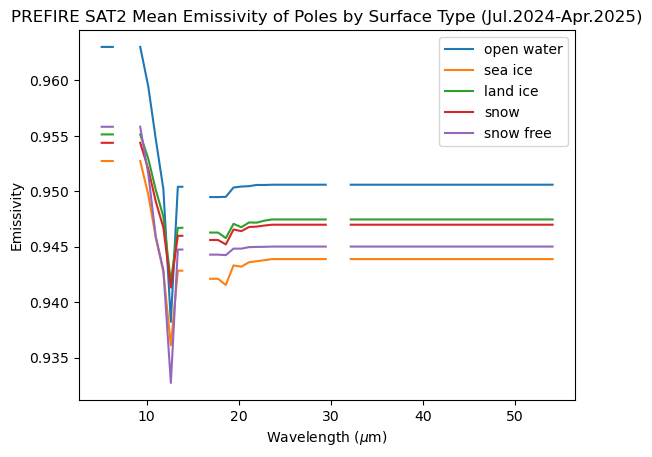

In [7]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT2_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
emissivity=ds["emis_mean"]
emissivity=emissivity.mean("time")
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("lon") # take a mean spatially across longitude
emissivity=emissivity.mean("lat") # take a mean spatially across latitude
#define a variable for each surface type
#I'm just going to do open ocean, sea ice, land ice, snow-covered land, and snow-free for now
open_water_emissivity=emissivity.sel(sfc_type=0)
sea_ice_emissivity=emissivity.sel(sfc_type=1)
land_ice_emissivity=emissivity.sel(sfc_type=3)
snow_covered_emissivity=emissivity.sel(sfc_type=5)
snow_free_emissivity=emissivity.sel(sfc_type=7)
#print the shape as a sanity check
print(emissivity.shape)
print(open_water_emissivity.shape)
plt.plot(wavelength,open_water_emissivity,label="open water")
plt.plot(wavelength,sea_ice_emissivity,label="sea ice")
plt.plot(wavelength,land_ice_emissivity,label="land ice")
plt.plot(wavelength,snow_covered_emissivity,label="snow")
plt.plot(wavelength,snow_free_emissivity,label="snow free")
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel("Emissivity")
plt.title("PREFIRE SAT2 Mean Emissivity of Poles by Surface Type (Jul.2024-Apr.2025)")
plt.legend()
plt.savefig("/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/Plots/Mean_Emissivity_Spectra/PREFIRE_SAT2_Mean_Emissivity.png")

# Spatial Plots

## SAT 1

In [4]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT1_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].mean("time")
longitude=ds["longitude"].mean("time")
emissivity=ds["emis_mean"]
emissivity=emissivity.mean("time")
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("sfc_type") # take a mean across each of the surface types
emissivity=emissivity.sel(spectral=28) # take observations only from channel 29

Text(0.5, 1.0, 'PREFIRE SAT1 Channel 29 (25.29um) Arctic Mean Emissivity (Aug.2024-Apr.2025)')

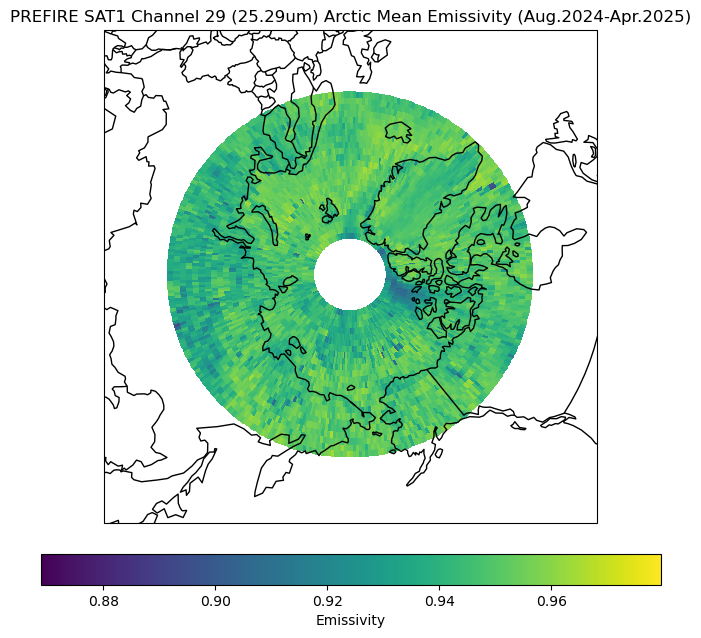

In [10]:
# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT1 Channel 29 (25.29um) Arctic Mean Emissivity (Aug.2024-Apr.2025)')

Text(0.5, 1.0, 'PREFIRE SAT1 Channel 29 (25.29um) Antarctic Mean Emissivity (Aug.2024-Apr.2025)')

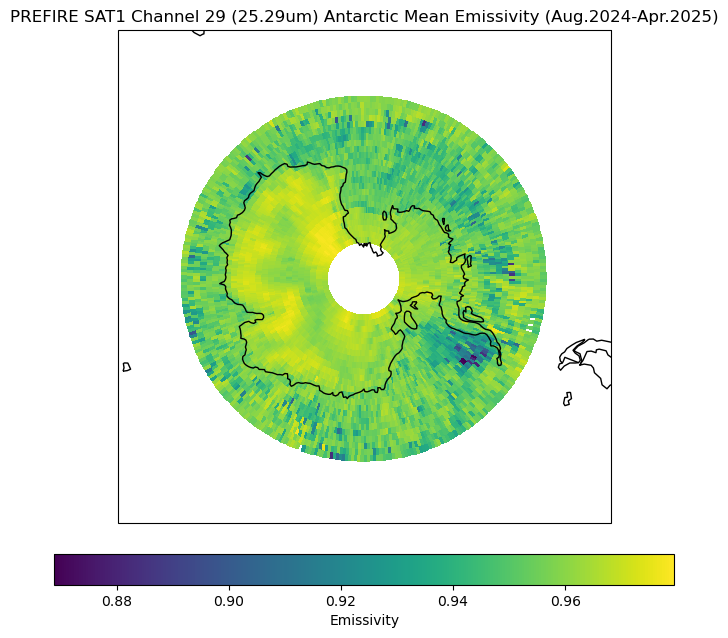

In [9]:
# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, -50, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT1 Channel 29 (25.29um) Antarctic Mean Emissivity (Aug.2024-Apr.2025)')

## SAT 2

In [12]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT2_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].mean("time")
longitude=ds["longitude"].mean("time")
emissivity=ds["emis_mean"]
emissivity=emissivity.mean("time")
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations
emissivity=emissivity.mean("sfc_type") # take a mean across each of the surface types
emissivity=emissivity.sel(spectral=28) # take observations only from channel 29

Text(0.5, 1.0, 'PREFIRE SAT2 Channel 29 (25.29um) Arctic Mean Emissivity (July.2024-Apr.2025)')

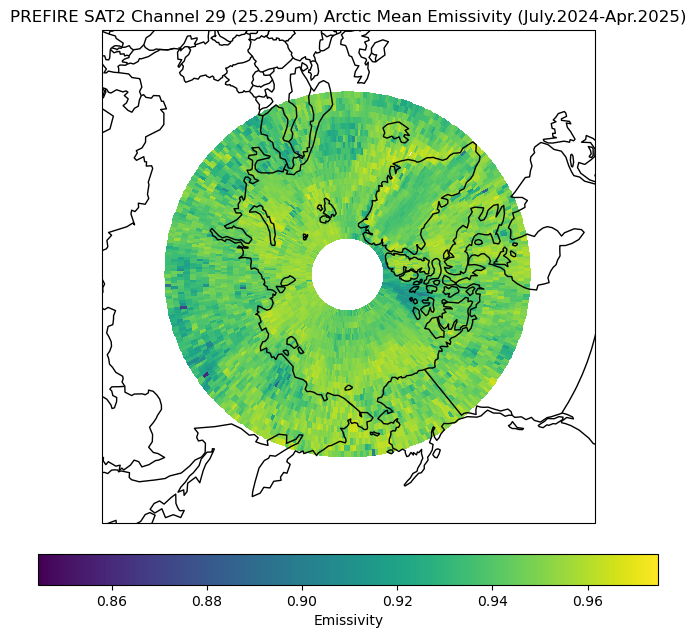

In [13]:
# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT2 Channel 29 (25.29um) Arctic Mean Emissivity (July.2024-Apr.2025)')

Text(0.5, 1.0, 'PREFIRE SAT2 Channel 29 (25.29um) Antarctic Mean Emissivity (July.2024-Apr.2025)')

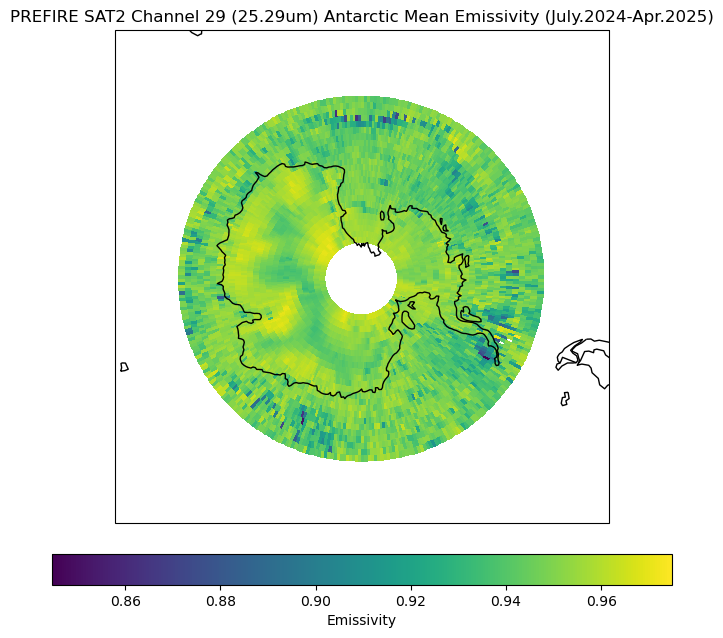

In [14]:
# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, -50, -90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT2 Channel 29 (25.29um) Antarctic Mean Emissivity (July.2024-Apr.2025)')

# Plotting by Season

# SAT1 (Reminder that SAT1 only has observations for August in the Summer of 2024) 

Text(0.5, 1.0, 'PREFIRE SAT1 Channel 29 (25.29um) Arctic Mean Emissivity (Aug.2024)')

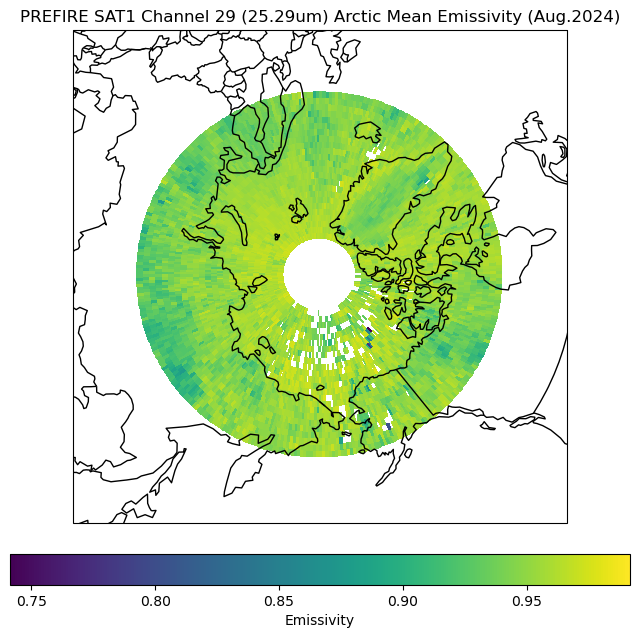

In [3]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT1_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
#print(latitude.shape)
#print(latitude)
longitude=ds["longitude"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
#print(longitude.shape)
#print(longitude)
emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("sfc_type") # take a mean across each of the surface types
emissivity=emissivity.sel(spectral=28) # take observations only from channel 29
#print(emissivity.shape)
#print(emissivity)

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT1 Channel 29 (25.29um) Arctic Mean Emissivity (Aug.2024)')

Text(0.5, 1.0, 'PREFIRE SAT1 Channel 29 (25.29um) Arctic Mean Emissivity (Dec.2024-Feb.2025)')

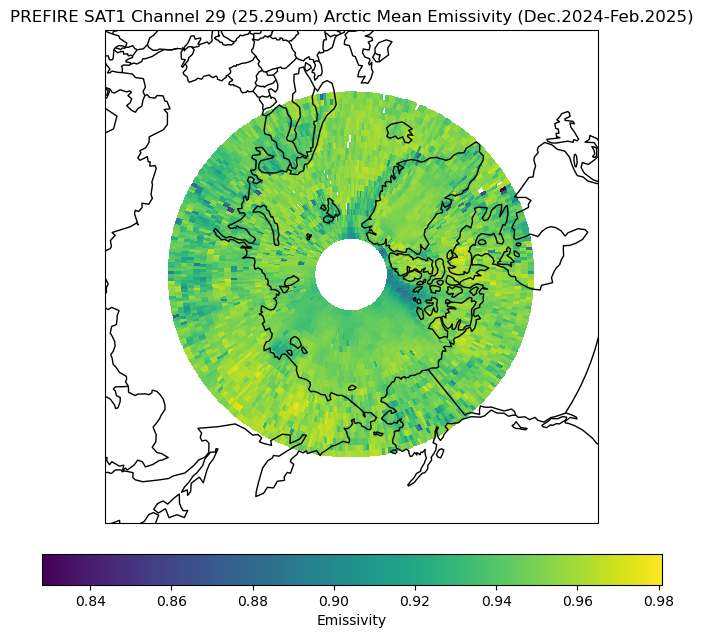

In [25]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT1_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
#print(latitude.shape)
#print(latitude)
longitude=ds["longitude"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
#print(longitude.shape)
#print(longitude)
emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("sfc_type") # take a mean across each of the surface types
emissivity=emissivity.sel(spectral=28) # take observations only from channel 29
#print(emissivity.shape)
#print(emissivity)

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT1 Channel 29 (25.29um) Arctic Mean Emissivity (Dec.2024-Feb.2025)')

# SAT1 (Reminder that SAT1 only has observations for July and August in the Summer of 2024)

Text(0.5, 1.0, 'PREFIRE SAT2 Channel 29 (25.29um) Arctic Mean Emissivity (July.2024-Aug.2024)')

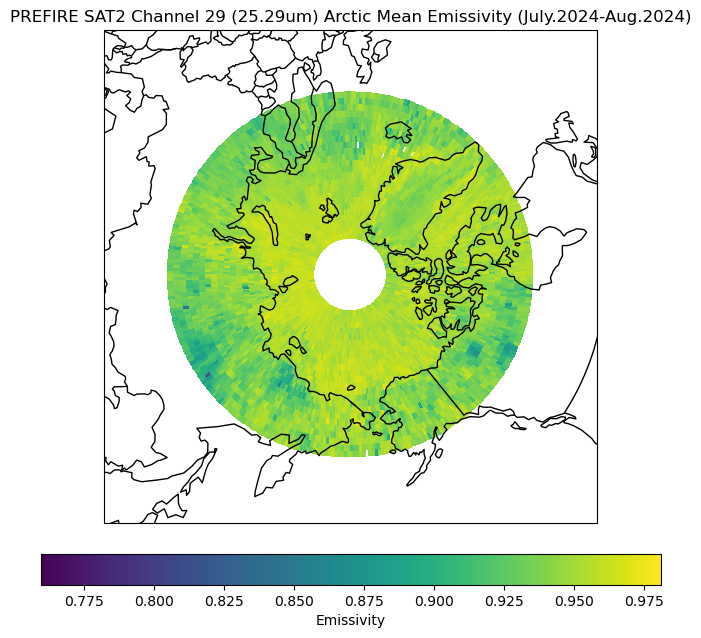

In [26]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT2_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
longitude=ds["longitude"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("sfc_type") # take a mean across each of the surface types
emissivity=emissivity.sel(spectral=28) # take observations only from channel 29
#print(emissivity.shape)
#print(emissivity)

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT2 Channel 29 (25.29um) Arctic Mean Emissivity (July.2024-Aug.2024)')

Text(0.5, 1.0, 'PREFIRE SAT2 Channel 29 (25.29um) Arctic Mean Emissivity (Dec.2024-Feb.2025)')

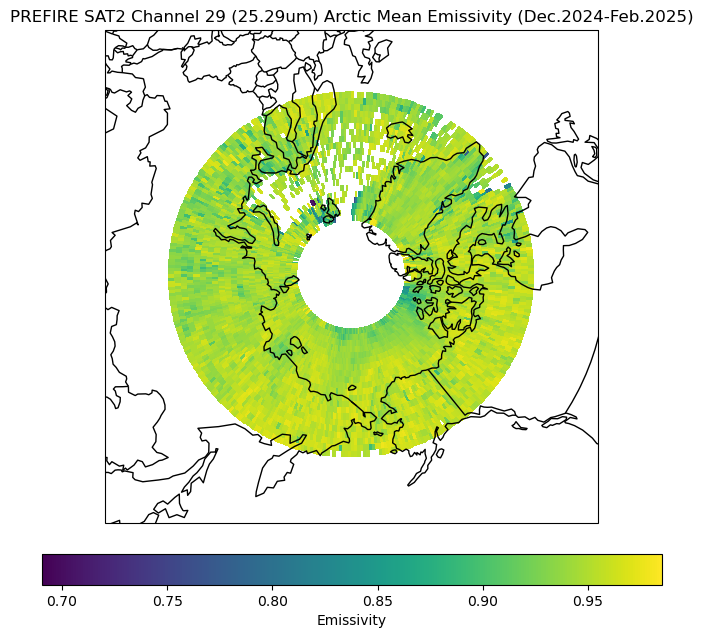

In [27]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT2_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
#print(latitude.shape)
#print(latitude)
longitude=ds["longitude"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
#print(longitude.shape)
#print(longitude)
emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
emissivity=emissivity.mean("xtrack") # take a mean of all x-track observations 
emissivity=emissivity.mean("sfc_type") # take a mean across each of the surface types
emissivity=emissivity.sel(spectral=28) # take observations only from channel 29
#print(emissivity.shape)
#print(emissivity)

# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, emissivity.values.squeeze(), transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Emissivity')

plt.title('PREFIRE SAT2 Channel 29 (25.29um) Arctic Mean Emissivity (Dec.2024-Feb.2025)')

# Okay great! This proves that Far-IR emissivity is greater over water and that the Arctic is more emissive in the Summer in the Far-IR
# Now we need to get the spatial change in emissivity between summer and winter 

# SAT1

Text(0.5, 1.0, 'PREFIRE SAT1 Channel 29 (25.29um) Arctic Winter-Summer Δ Emissivity')

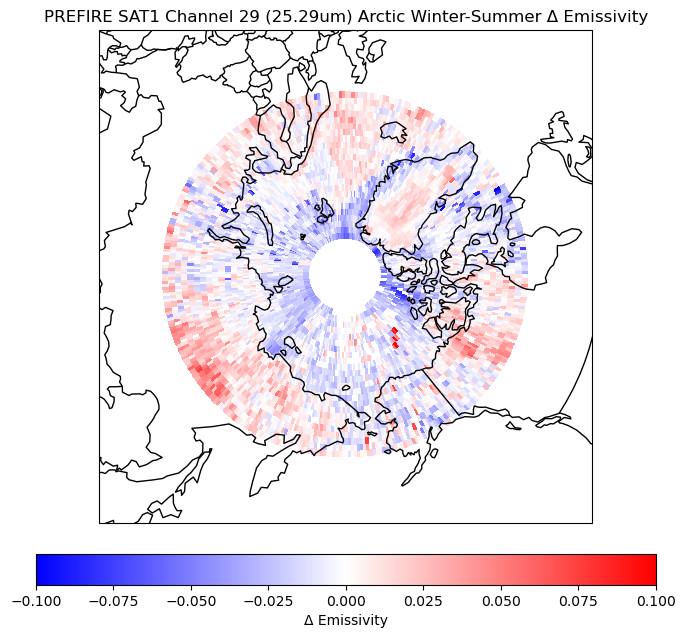

In [15]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT1_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].mean("time") #Select and average across time (the months don't matter since it is like wavelength in it being the same for every month)
longitude=ds["longitude"].mean("time") #Select and average across time (the months don't matter since it is like wavelength in it being the same for every month)
summer_emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
summer_emissivity=summer_emissivity.mean("xtrack") # take a mean of all x-track observations 
summer_emissivity=summer_emissivity.mean("sfc_type") # take a mean across each of the surface types
summer_emissivity=summer_emissivity.sel(spectral=28) # take observations only from channel 29
winter_emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
winter_emissivity=winter_emissivity.mean("xtrack") # take a mean of all x-track observations 
winter_emissivity=winter_emissivity.mean("sfc_type") # take a mean across each of the surface types
winter_emissivity=winter_emissivity.sel(spectral=28) # take observations only from channel 29
# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, (winter_emissivity-summer_emissivity).values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-0.1, vmax=0.1)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Δ Emissivity')

plt.title('PREFIRE SAT1 Channel 29 (25.29um) Arctic Winter-Summer Δ Emissivity')

# SAT2

Text(0.5, 1.0, 'PREFIRE SAT2 Channel 29 (25.29um) Arctic Winter-Summer Δ Emissivity')

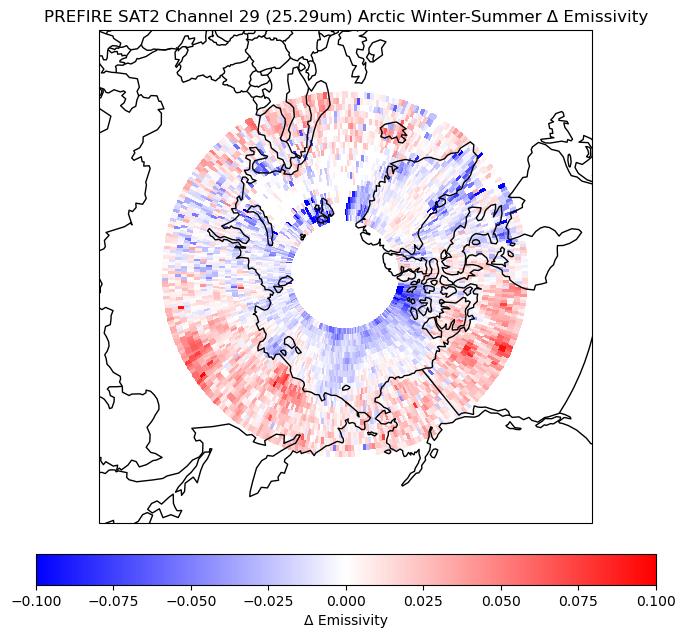

In [16]:
path="/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/SAT2_Combined_L3_Emissivity/*.nc"
ds=xr.open_mfdataset(path)
wavelength=ds["wavelength"][0,0,:] #you can select wavelength for any month and for any x-track because the centeral wavelengths are the same (or approximately the same)
latitude=ds["latitude"].mean("time") #Select and average across time (the months don't matter since it is like wavelength in it being the same for every month)
longitude=ds["longitude"].mean("time") #Select and average across time (the months don't matter since it is like wavelength in it being the same for every month)
summer_emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean("time") #Select and average across just Summer months
summer_emissivity=summer_emissivity.mean("xtrack") # take a mean of all x-track observations 
summer_emissivity=summer_emissivity.mean("sfc_type") # take a mean across each of the surface types
summer_emissivity=summer_emissivity.sel(spectral=28) # take observations only from channel 29
winter_emissivity=ds["emis_mean"].sel(time=ds['time'].dt.month.isin([1, 2, 12])).mean("time") #Select and average across just Summer months
winter_emissivity=winter_emissivity.mean("xtrack") # take a mean of all x-track observations 
winter_emissivity=winter_emissivity.mean("sfc_type") # take a mean across each of the surface types
winter_emissivity=winter_emissivity.sel(spectral=28) # take observations only from channel 29
# Plotting on a globe using Cartopy
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=180))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the radiance data for the selected granule
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
mesh = ax.pcolormesh(longitude.values, latitude.values, (winter_emissivity-summer_emissivity).values.squeeze(), transform=ccrs.PlateCarree(), cmap='bwr', vmin=-0.1, vmax=0.1)

# Add a colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cb.set_label('Δ Emissivity')

plt.title('PREFIRE SAT2 Channel 29 (25.29um) Arctic Winter-Summer Δ Emissivity')
plt.savefig('/projects/etdu2967/ATOC4900/PREFIRE/L3_Emissivity/Plots/Seasonal_Plots/SAT2_Channel_29_Arctic_Winter-Summer_Δ_Emissivity_.png')